# Intro to ANN with Keras

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2,3)]
y = (iris.target==0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2,0.5]])

In [4]:
y_pred

array([0])

# Implementation with Keras

In [5]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [6]:
tf.__version__

'2.3.0'

In [7]:
keras.__version__

'2.4.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [10]:
X_train_full.shape

(60000, 28, 28)

In [11]:
X_train_full.dtype

dtype('uint8')

In [12]:
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Coat


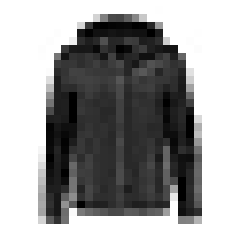

In [14]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off');
print(class_names[y_train[0]])

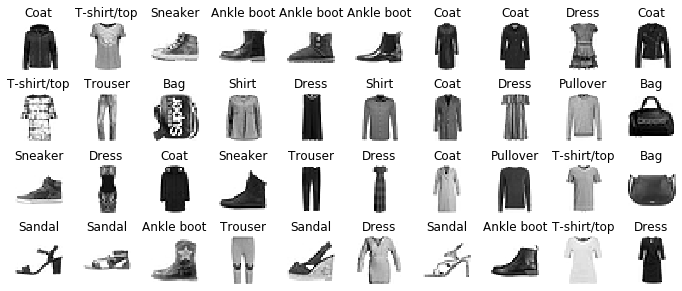

In [15]:
n_rows = 4
n_cols= 10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

## Multilayer perceptron model

In [16]:
# keras.backend.clear_session()
# np.random.seed(42)
# tf.random.set_seed(42)

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
# adding layers using a list
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [19]:
model.layers

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [22]:
# model.get_layer('dense_9') is hidden1

In [23]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.01343664, -0.04034975, -0.033693  , ...,  0.06661358,
        -0.03754197,  0.01974757],
       [ 0.01108887, -0.01771075, -0.03244324, ...,  0.07414724,
        -0.02597918,  0.03784488],
       [-0.00616506, -0.00142281, -0.01017401, ..., -0.03477769,
         0.03038578,  0.0724909 ],
       ...,
       [-0.01012345, -0.05538828,  0.06335203, ...,  0.05772132,
         0.04956391,  0.04950779],
       [-0.00262187, -0.04040875, -0.02307134, ...,  0.02316494,
        -0.03716162,  0.02456347],
       [-0.06376546,  0.00046647, -0.02537304, ..., -0.06250965,
        -0.06352408, -0.06160165]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer='sgd', metrics=['accuracy'])

In [28]:
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7139 - accuracy: 0.7658 - val_loss: 0.5019 - val_accuracy: 0.8322
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4891 - accuracy: 0.8295 - val_loss: 0.4445 - val_accuracy: 0.8532
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4426 - accuracy: 0.8448 - val_loss: 0.4101 - val_accuracy: 0.8616
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4152 - accuracy: 0.8546 - val_loss: 0.3934 - val_accuracy: 0.8662
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3960 - accuracy: 0.8615 - val_loss: 0.3784 - val_accuracy: 0.8688
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3792 - accuracy: 0.8662 - val_loss: 0.3678 - val_accuracy: 0.8730
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3661 - accuracy: 0.8710 - val_loss: 0.3953 - val_accuracy:

In [29]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [30]:
history.history

{'loss': [0.7138763070106506,
  0.48905104398727417,
  0.44263795018196106,
  0.415158212184906,
  0.39600870013237,
  0.37921378016471863,
  0.3661125600337982,
  0.3540496826171875,
  0.3437483310699463,
  0.33382081985473633],
 'accuracy': [0.765818178653717,
  0.8295454382896423,
  0.8447636365890503,
  0.8545636534690857,
  0.8614909052848816,
  0.8661999702453613,
  0.8710363507270813,
  0.8750181794166565,
  0.8781090974807739,
  0.8810363411903381],
 'val_loss': [0.5018895268440247,
  0.44450053572654724,
  0.41005101799964905,
  0.39338219165802,
  0.37839335203170776,
  0.3678254783153534,
  0.3953065574169159,
  0.35346072912216187,
  0.34867191314697266,
  0.3417286276817322],
 'val_accuracy': [0.8321999907493591,
  0.8532000184059143,
  0.8615999817848206,
  0.8661999702453613,
  0.8687999844551086,
  0.8730000257492065,
  0.8583999872207642,
  0.878000020980835,
  0.8730000257492065,
  0.8794000148773193]}

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

(0, 1)

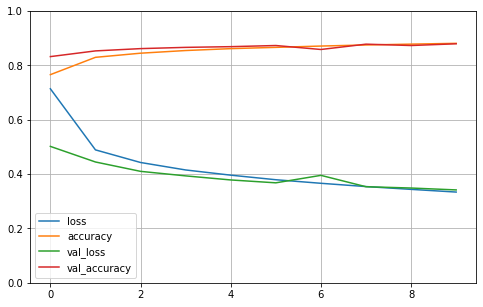

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 63.8332 - accuracy: 0.8326


[63.833168029785156, 0.8325999975204468]

In [34]:
X_new = X_test[:3]
X_new.shape

(3, 28, 28)

In [35]:
y_proba = model.predict(X_new)
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [36]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

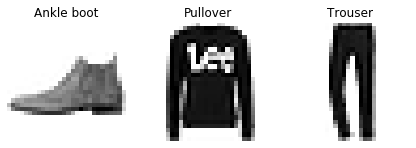

In [39]:
plt.figure(figsize=(3*2.4, 1*2.4))
for idx, image in enumerate(X_new):
    plt.subplot(1, 3, idx+1)
    plt.imshow(image, cmap='binary',interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[idx]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
tf.random.set_seed(42)

In [58]:
housing = fetch_california_housing()

In [59]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [63]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

# model.compile(loss='mean_squared_error', optimizer='sgd')
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8737 - val_loss: 0.7688
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6360 - val_loss: 0.6091
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5649 - val_loss: 0.5705
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5354 - val_loss: 0.5174
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5143 - val_loss: 0.4895
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4965 - val_loss: 0.4710
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4821 - val_loss: 0.4634
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4702 - val_loss: 0.4442
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4602 - val_loss: 0.4338
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4519 - val_loss: 0.4252

In [64]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4100
0.40997233986854553


In [65]:
X_new = X_test[:3]
X_new.shape

(3, 8)

In [66]:
y_pred = model.predict(X_new)
y_pred

array([[0.58685386],
       [1.7166947 ],
       [3.4294932 ]], dtype=float32)

In [67]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

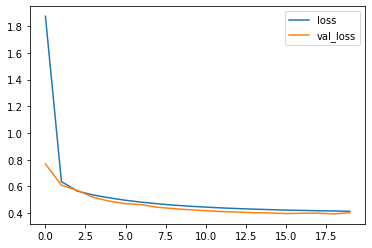

In [70]:
pd.DataFrame(history.history).plot()